# Showcase!

## Test data:
A sinusoid with a noise variance of $\beta = 0.3^2$.

$y = sin(2*\pi*x*f)$

$t = y + N(x|0,\beta)$

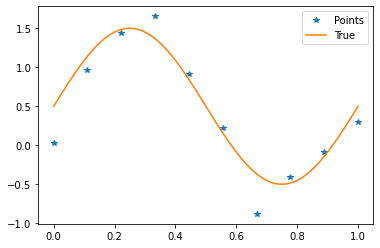

In [100]:
import Bayesian.BasisFunction.BF_fitting as BF

beta = 0.3**2
alpha = 11.1

N = 10
X = np.linspace(0,1,N).reshape(-1,1)
y = BF.g(X, noise_variance=(0))
t = BF.g(X, noise_variance=(beta))

X_test = np.linspace(0, 1, 100).reshape(-1, 1)
y_test = BF.g(X_test, noise_variance=(0))

plt.plot(X, t, '*', label='Points')
plt.plot(X_test, y_test, label='True')
plt.legend()
plt.show()

## Basis function curve fitting.
If something is known about the system basis functions can be used to fit a curve to the data points.
Using a polynomial we can see how the algorithm improves at predicting the system.

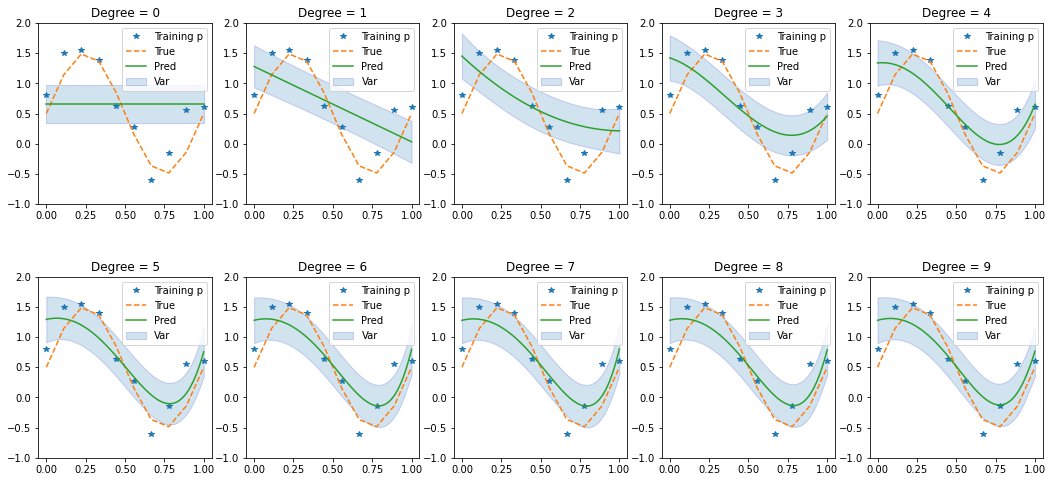

In [91]:
degree = 9
degrees = range(degree + 1)

phi = BF.expand(X, bf=BF.polynomial_basis_function, bf_args=degrees[1:])
phi_test = BF.expand(X_test, bf=BF.polynomial_basis_function, bf_args=degrees[1:])

plt.figure(figsize=(18, 8))
plt.subplots_adjust(hspace=0.4)

for d in degrees:
    up = d + 1
    m_N, S_N = BF.posterior(phi[:,:up], t, 1/alpha, 1/beta)
    y_pred, y_var = BF.posterior_predictive(phi_test[:,:up], m_N, S_N, 1/beta)

    plt.subplot(2, 5, up)
    plt.plot(X, t, '*')
    plt.plot(X, y, linestyle='dashed')
    plt.plot(X_test, y_pred, label=None)
    plt.fill_between(X_test[:,0], y_pred[:,0]-np.sqrt(y_var), y_pred[:,0]+np.sqrt(y_var), alpha=0.2, edgecolor='#1B2ACC')
    plt.legend(['Training p', 'True', 'Pred', 'Var'])
    plt.title(f'Degree = {d}')
    plt.ylim(-1.0, 2.0)



## Gaussian processes

e:\Coding\Algorithms\utils\plot_helper.py:78: RuntimeWarning: invalid value encountered in sqrt
  uncertainty = 1.96 * np.sqrt(np.diag(cov))


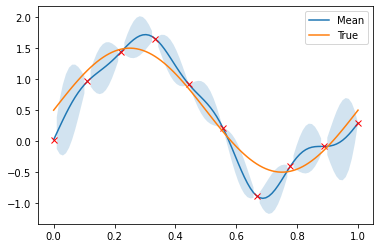

[]

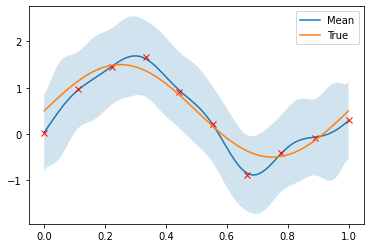

In [163]:
import Bayesian.GaussianProcesses.GP as GP
from utils.plot_helper import plot_gp
import matplotlib.pyplot as plt
import numpy as np

def noise(size, variance):
        return np.random.normal(scale=np.sqrt(variance), size=size)

gp = GP.GP(5, 0.13)

mean, sigma = gp.posterior(X, t, X_test, 0)

mean2, sigma2 = gp.posterior(X, t, X_test, beta)

plot_gp(mean, sigma, X_test, X_train=X, Y_train=t)
plt.plot(X_test, y_test, label='True')
plt.legend()
plt.plot()
plt.show()

plot_gp(mean2, sigma2, X_test, X_train=X, Y_train=t)
plt.plot(X_test, y_test, label='True')
plt.legend()
plt.plot()